## 多变量线性回归(Linear Regression with Multiple Variables)

In [2]:
#初始化工作
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### 1、加载数据
 数据格式为：
 
X1,X2,Y

2104,3,399900

1600,3,329900

2400,3,369000

1416,2,232000

将数据逐行读取，用逗号切分，并放入np.array


In [4]:
#加载数据
def load_exdata(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f.readlines(): 
            line = line.split(',')
            current = [int(item) for item in line]
            #5.5277,9.1302
            data.append(current)
    return data

data = load_exdata('ex1data2.txt');
data = np.array(data,np.int64)

x = data[:,(0,1)].reshape((-1,2))
y = data[:,2].reshape((-1,1))
m = y.shape[0]
print('m：\n',m)

# Print out some data points
print('First 10 examples from the dataset: \n')
print(' x = ',x[range(10),:],'\ny=',y[range(10),:])

m：
 47
First 10 examples from the dataset: 

 x =  [[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]] 
y= [[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]]


## 2、通过梯度下降求解theta

1. 面对多维特征问题的时候，要保证特征具有相近的尺度，这将帮助梯度下降算法更快地收敛。解决的方法是尝试将所有特征的尺度都尽量缩放到-1 到 1 之间，最简单的方法就是(X - mu) / sigma，其中mu是平均值， sigma 是标准差。
2. 损失函数和单变量一样，依然计算损失平方和均值
3. X需要加上一列1

In [12]:
#特征缩放
def featureNormalize(X):
    X_norm = X;
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
#     print(mu)
#     print(sigma)
    for i in range(X.shape[1]):
        mu[0,i] = np.mean(X[:,i]) # 均值
        sigma[0,i] = np.std(X[:,i])     # 标准差
#     print(mu)
#     print(sigma)
    X_norm  = (X - mu) / sigma
    print('特征缩放后的数据：\n',X_norm)
    return X_norm,mu,sigma

#计算损失
def computeCost(X, y, theta):
    m = y.shape[0]
#     J = (np.sum((X.dot(theta) - y)**2)) / (2*m) 
    C = X.dot(theta) - y
    J2 = (C.T.dot(C))/ (2*m)
    return J2

#梯度下降
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    #print(m)
    # 存储历史误差
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        # 对J求导，得到 alpha/m * (WX - Y)*x(i)， (3,m)*(m,1)  X (m,3)*(3,1) = (m,1)
        theta = theta - (alpha/m) * (X.T.dot(X.dot(theta) - y))
        J_history[iter] = computeCost(X, y, theta)
    return J_history,theta
    
iterations = 10000  #迭代次数
alpha = 0.01    #学习率
x = data[:,(0,1)].reshape((-1,2))
y = data[:,2].reshape((-1,1))
m = y.shape[0]
x,mu,sigma = featureNormalize(x)
X = np.hstack([x,np.ones((x.shape[0], 1))])#np.vstack():在竖直方向上堆叠   np.hstack():在水平方向上平铺
# X = X[range(2),:]
# y = y[range(2),:]

theta = np.zeros((3, 1))

j = computeCost(X,y,theta)
J_history,theta = gradientDescent(X, y, theta, alpha, iterations)


print('Theta found by gradient descent',theta)

特征缩放后的数据：
 [[  1.31415422e-01  -2.26093368e-01]
 [ -5.09640698e-01  -2.26093368e-01]
 [  5.07908699e-01  -2.26093368e-01]
 [ -7.43677059e-01  -1.55439190e+00]
 [  1.27107075e+00   1.10220517e+00]
 [ -1.99450507e-02   1.10220517e+00]
 [ -5.93588523e-01  -2.26093368e-01]
 [ -7.29685755e-01  -2.26093368e-01]
 [ -7.89466782e-01  -2.26093368e-01]
 [ -6.44465993e-01  -2.26093368e-01]
 [ -7.71822042e-02   1.10220517e+00]
 [ -8.65999486e-04  -2.26093368e-01]
 [ -1.40779041e-01  -2.26093368e-01]
 [  3.15099326e+00   2.43050370e+00]
 [ -9.31923697e-01  -2.26093368e-01]
 [  3.80715024e-01   1.10220517e+00]
 [ -8.65782986e-01  -1.55439190e+00]
 [ -9.72625673e-01  -2.26093368e-01]
 [  7.73743478e-01   1.10220517e+00]
 [  1.31050078e+00   1.10220517e+00]
 [ -2.97227261e-01  -2.26093368e-01]
 [ -1.43322915e-01  -1.55439190e+00]
 [ -5.04552951e-01  -2.26093368e-01]
 [ -4.91995958e-02   1.10220517e+00]
 [  2.40309445e+00  -2.26093368e-01]
 [ -1.14560907e+00  -2.26093368e-01]
 [ -6.90255715e-01  -2.2609

### 绘制迭代收敛图

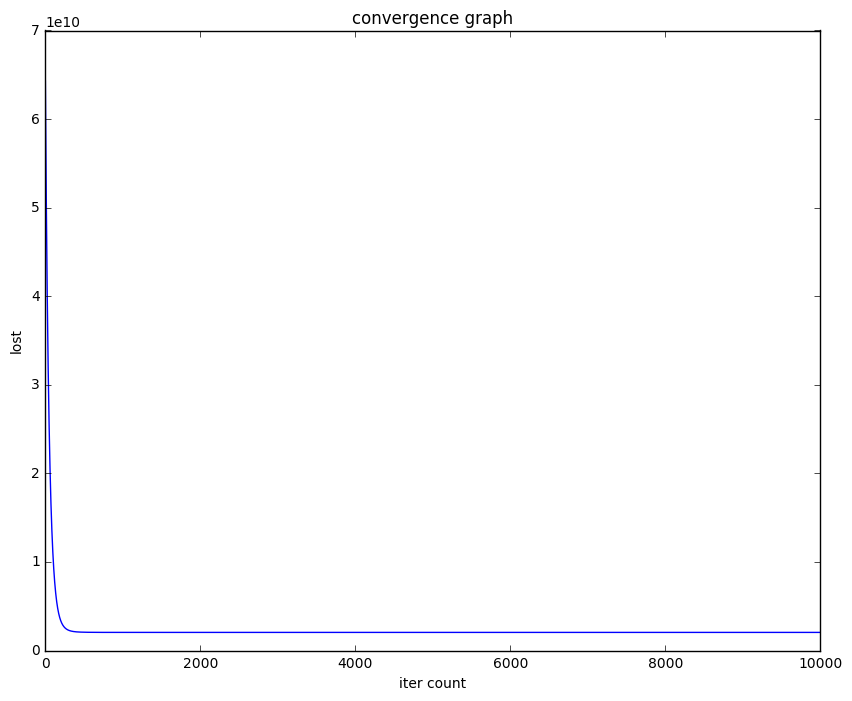

In [6]:
plt.plot(J_history)
plt.ylabel('lost');
plt.xlabel('iter count')
plt.title('convergence graph')

### 预测

In [16]:
def predict(data):
    testx = np.array(data)
    print('原始数据：\n',testx)
    testx = ((testx - mu) / sigma)
    print('特征缩放后的数据：\n',testx)
    testx = np.hstack([testx,np.ones((testx.shape[0], 1))])
    print('增加列1的数据：\n',testx)
    price = testx.dot(theta)
    print('price is %d ' % (price))

predict([1650,3])

原始数据：
 [1650    3]
特征缩放后的数据：
 [[-0.44604386 -0.22609337]]
增加列1的数据：
 [[-0.44604386 -0.22609337  1.        ]]
price is 293081 
